# Teil 2: Transformieren, Extrahieren und Visualisieren von Features
## Mit Polars und Seaborn

Seaborn bietet uns eine einfache Möglichkeit um Grafiken übersichtlich und visuell ansprechend aufzubereiten, ohne uns in den komplexen Einstellungsmöglichkeiten von matplotlib zu verlieren, auf welcher seaborn basiert.  

Es gibt mehrere gute Visualisierungbibliotheken:

| **Name**        | **Typ**         | **Quelle**                                      | **Dim** | **Basiert auf** | **Beschreibung**                                                                                                                                                                 |
|-----------------|-----------------|-------------------------------------------------|---------|-----------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Matplotlib      | Bibliothek      | https://matplotlib.org/                         | 2D, 3D  | -               | Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.       |
| Seaborn         | Bibliothek      | https://seaborn.pydata.org/                     | 2D      | Matplotlib      | Visuell ansprechende Plots über eine einfache, deklarative API. Wenn man das Styling über Themes hinaus anpasen will, muss man auf Matplotlib zugreifen                                                                                                                 |
| Altair          | Bibliothek      | https://altair-viz.github.io/gallery/index.html | 2D      | Vega/Vega-Lite (JS)            | Ähnlich einfach wie Seaborn, jedoch mit einer anderen API unn herangehensweise. Zusätzlich bietet es interaktive Features (Pan/Zoom/Tooltips) und es ist einfach das Styling anzupassen                                  |
| Plotnine        | Bibliothek      | https://plotnine.readthedocs.io/en/stable/      | 2D      | Matplotlib      | Ein Python Port von ggplot2, welches im R-Universum sehr beliebt ist. Die API basiert auf einer "Grammatik" für Grafiken und ist für Anfänger meist etwas schwerer zu verstehen. |
| Plotly          | Bibliothek      | https://github.com/plotly/plotly.py             | 2D, 3D  | plotly.js       | Interaktive HTML-Plots in 2D und 3D, die in einem Browser angezeigt werden können. Die API ist sehr umfangreich und bietet viele Möglichkeiten, mit den Plots zu interagieren.   |
| Apache Superset | Web-Applikation | https://github.com/apache/superset              | 2D, 3D  | -               | Eine freie Webanwendung zur interaktiven Datenexploration und Business-Intelligence welche mit vielen Datenquellen direkt umgehen kann.                                          |


Leider unterstuetzen noch nicht alle Bibliotheken das neue Arrow-Format vollstaendig. Bei Seaborn geht es zu einem grossen Teil schon, fuer manche Funktionen wird aber immernoch eine Konvertierung in einen pandas.DataFrame benoetigt. Da Seaborn im Vergleich ein gutes Feature-Set hat, werden wir es fuer die Visualisierung verwenden.

In [1]:
import polars as pl
import pandas as pd
import seaborn.objects as so
import seaborn as sns

In [2]:
df = pl.read_ipc('resources/data/bicycle-geometry/geometrics.mtb-news.de.arrow', memory_map=False)

In [3]:
df.with_columns(
    pl.col('Year').cast(pl.Int32)
)

shape: (6529, 30)
┌───────────────┬────────┬───────┬──────┬─────┬─────────────┬────────────┬────────────┬────────────┐
│ URL           ┆ Brand  ┆ Model ┆ Year ┆ ... ┆ Fork Offset ┆ Fork Trail ┆ Suspension ┆ Suspension │
│ ---           ┆ ---    ┆ ---   ┆ ---  ┆     ┆ ---         ┆ ---        ┆ Travel     ┆ Travel     │
│ str           ┆ str    ┆ str   ┆ i32  ┆     ┆ f64         ┆ f64        ┆ (rear)     ┆ (front)    │
│               ┆        ┆       ┆      ┆     ┆             ┆            ┆ ---        ┆ ---        │
│               ┆        ┆       ┆      ┆     ┆             ┆            ┆ i64        ┆ i64        │
╞═══════════════╪════════╪═══════╪══════╪═════╪═════════════╪════════════╪════════════╪════════════╡
│ https://geome ┆ 1of1   ┆ R.01  ┆ 2023 ┆ ... ┆ null        ┆ null       ┆ null       ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ https://geome ┆ 1of1   ┆ R.01  ┆ 2023 ┆ ... ┆ null        ┆ null       ┆ null       ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ https://geome ┆ 1of1   ┆ R.01  ┆ 2023 ┆ ... ┆ null        ┆ null       ┆ null       ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ https://geome ┆ 1of1   ┆ R.01  ┆ 2023 ┆ ... ┆ null        ┆ null       ┆ null       ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ ...           ┆ ...    ┆ ...   ┆ ...  ┆ ... ┆ ...         ┆ ...        ┆ ...        ┆ ...        │
│ https://geome ┆ Zoceli ┆ Naosm ┆ 2021 ┆ ... ┆ 51.0        ┆ null       ┆ 150        ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ https://geome ┆ Zoceli ┆ Naosm ┆ 2021 ┆ ... ┆ 51.0        ┆ null       ┆ 150        ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ https://geome ┆ Zoceli ┆ Naosm ┆ 2021 ┆ ... ┆ 51.0        ┆ null       ┆ 150        ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ https://geome ┆ Zoceli ┆ Naosm ┆ 2021 ┆ ... ┆ 51.0        ┆ null       ┆ 150        ┆ null       │
│ trics.mtb-new ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
│ s.de/b...     ┆        ┆       ┆      ┆     ┆             ┆            ┆            ┆            │
└───────────────┴────────┴───────┴──────┴─────┴─────────────┴────────────┴────────────┴────────────┘

In [4]:
df.null_count()

shape: (1, 30)
┌─────┬───────┬───────┬──────┬─────┬─────────────┬────────────┬──────────────────┬─────────────────┐
│ URL ┆ Brand ┆ Model ┆ Year ┆ ... ┆ Fork Offset ┆ Fork Trail ┆ Suspension       ┆ Suspension      │
│ --- ┆ ---   ┆ ---   ┆ ---  ┆     ┆ ---         ┆ ---        ┆ Travel (rear)    ┆ Travel (front)  │
│ u32 ┆ u32   ┆ u32   ┆ u32  ┆     ┆ u32         ┆ u32        ┆ ---              ┆ ---             │
│     ┆       ┆       ┆      ┆     ┆             ┆            ┆ u32              ┆ u32             │
╞═════╪═══════╪═══════╪══════╪═════╪═════════════╪════════════╪══════════════════╪═════════════════╡
│ 0   ┆ 0     ┆ 0     ┆ 0    ┆ ... ┆ 2975        ┆ 5820       ┆ 2572             ┆ 2140            │
└─────┴───────┴───────┴──────┴─────┴─────────────┴────────────┴──────────────────┴─────────────────┘

In [5]:
df = df.drop(
    [
    'Motorized',
     'Front Center',
     'Top Tube Length',
     'Top Tube Length Horizontal',
     'Standover Height',
     'Bottom Bracket Height',
     'Fork Installation Height',
     'Fork Offset',
     'Fork Trail',
     'Suspension Travel (rear)',
     'Suspension Travel (front)'
    ]
)


In [6]:
df.head()

shape: (5, 19)
┌──────────────────────┬───────┬───────┬──────┬─────┬────────────┬───────────┬───────────┬─────────┐
│ URL                  ┆ Brand ┆ Model ┆ Year ┆ ... ┆ Seat Tube  ┆ Chainstay ┆ Wheelbase ┆ Bottom  │
│ ---                  ┆ ---   ┆ ---   ┆ ---  ┆     ┆ Length     ┆ Length    ┆ ---       ┆ Bracket │
│ str                  ┆ str   ┆ str   ┆ str  ┆     ┆ ---        ┆ ---       ┆ f64       ┆ Offset  │
│                      ┆       ┆       ┆      ┆     ┆ f64        ┆ f64       ┆           ┆ ---     │
│                      ┆       ┆       ┆      ┆     ┆            ┆           ┆           ┆ f64     │
╞══════════════════════╪═══════╪═══════╪══════╪═════╪════════════╪═══════════╪═══════════╪═════════╡
│ https://geometrics.m ┆ 1of1  ┆ R.01  ┆ 2023 ┆ ... ┆ 460.0      ┆ 408.0     ┆ 972.0     ┆ null    │
│ tb-news.de/b...      ┆       ┆       ┆      ┆     ┆            ┆           ┆           ┆         │
│ https://geometrics.m ┆ 1of1  ┆ R.01  ┆ 2023 ┆ ... ┆ 430.0      ┆ 408.0     ┆ 966.0     ┆ null    │
│ tb-news.de/b...      ┆       ┆       ┆      ┆     ┆            ┆           ┆           ┆         │
│ https://geometrics.m ┆ 1of1  ┆ R.01  ┆ 2023 ┆ ... ┆ 490.0      ┆ 408.0     ┆ 981.0     ┆ null    │
│ tb-news.de/b...      ┆       ┆       ┆      ┆     ┆            ┆           ┆           ┆         │
│ https://geometrics.m ┆ 1of1  ┆ R.01  ┆ 2023 ┆ ... ┆ 520.0      ┆ 408.0     ┆ 985.0     ┆ null    │
│ tb-news.de/b...      ┆       ┆       ┆      ┆     ┆            ┆           ┆           ┆         │
│ https://geometrics.m ┆ 1of1  ┆ R.01  ┆ 2023 ┆ ... ┆ 550.0      ┆ 408.0     ┆ 999.0     ┆ null    │
│ tb-news.de/b...      ┆       ┆       ┆      ┆     ┆            ┆           ┆           ┆         │
└──────────────────────┴───────┴───────┴──────┴─────┴────────────┴───────────┴───────────┴─────────┘

In [7]:
df.groupby(pl.col('Category')).count()

shape: (4, 2)
┌───────────┬───────┐
│ Category  ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Road      ┆ 794   │
│ Gravel/CX ┆ 903   │
│ Other     ┆ 45    │
│ Mountain  ┆ 4787  │
└───────────┴───────┘

In [8]:
for cat in df.get_column('Category').unique():
    print(cat)
    print(df.filter(
                pl.col('Category') == cat
            ).null_count() / df.filter(pl.col('Category') == cat).shape[0]*100)

Gravel/CX
shape: (1, 19)
┌─────┬───────┬───────┬──────┬─────┬───────────┬──────────────────┬───────────┬────────────────┐
│ URL ┆ Brand ┆ Model ┆ Year ┆ ... ┆ Seat Tube ┆ Chainstay Length ┆ Wheelbase ┆ Bottom Bracket │
│ --- ┆ ---   ┆ ---   ┆ ---  ┆     ┆ Length    ┆ ---              ┆ ---       ┆ Offset         │
│ f64 ┆ f64   ┆ f64   ┆ f64  ┆     ┆ ---       ┆ f64              ┆ f64       ┆ ---            │
│     ┆       ┆       ┆      ┆     ┆ f64       ┆                  ┆           ┆ f64            │
╞═════╪═══════╪═══════╪══════╪═════╪═══════════╪══════════════════╪═══════════╪════════════════╡
│ 0.0 ┆ 0.0   ┆ 0.0   ┆ 0.0  ┆ ... ┆ 3.765227  ┆ 0.110742         ┆ 13.178295 ┆ 11.960133      │
└─────┴───────┴───────┴──────┴─────┴───────────┴──────────────────┴───────────┴────────────────┘
Road
shape: (1, 19)
┌─────┬───────┬───────┬──────┬─────┬───────────┬──────────────────┬───────────┬────────────────┐
│ URL ┆ Brand ┆ Model ┆ Year ┆ ... ┆ Seat Tube ┆ Chainstay Length ┆ Wheelbase ┆ Bo

In [9]:
#df.filter(
#    pl.all(pl.col('Seat Tube Angle Effective')).is_null()
#).with_columns(
#    pl.col('Seat Tube Angle Effective')
#).fill_null(
#    pl.col('Seat Tube Angle Real')
#).drop('Seat Tube Angle Real')


In [10]:
df.null_count()

shape: (1, 19)
┌─────┬───────┬───────┬──────┬─────┬───────────┬──────────────────┬───────────┬────────────────┐
│ URL ┆ Brand ┆ Model ┆ Year ┆ ... ┆ Seat Tube ┆ Chainstay Length ┆ Wheelbase ┆ Bottom Bracket │
│ --- ┆ ---   ┆ ---   ┆ ---  ┆     ┆ Length    ┆ ---              ┆ ---       ┆ Offset         │
│ u32 ┆ u32   ┆ u32   ┆ u32  ┆     ┆ ---       ┆ u32              ┆ u32       ┆ ---            │
│     ┆       ┆       ┆      ┆     ┆ u32       ┆                  ┆           ┆ u32            │
╞═════╪═══════╪═══════╪══════╪═════╪═══════════╪══════════════════╪═══════════╪════════════════╡
│ 0   ┆ 0     ┆ 0     ┆ 0    ┆ ... ┆ 232       ┆ 44               ┆ 361       ┆ 913            │
└─────┴───────┴───────┴──────┴─────┴───────────┴──────────────────┴───────────┴────────────────┘

In [11]:
dfsr = df.filter(
    ~pl.all(pl.col('Reach')).is_null() &
    ~pl.all(pl.col('Stack')).is_null()
)

In [12]:
dfsr.shape

(6432, 19)

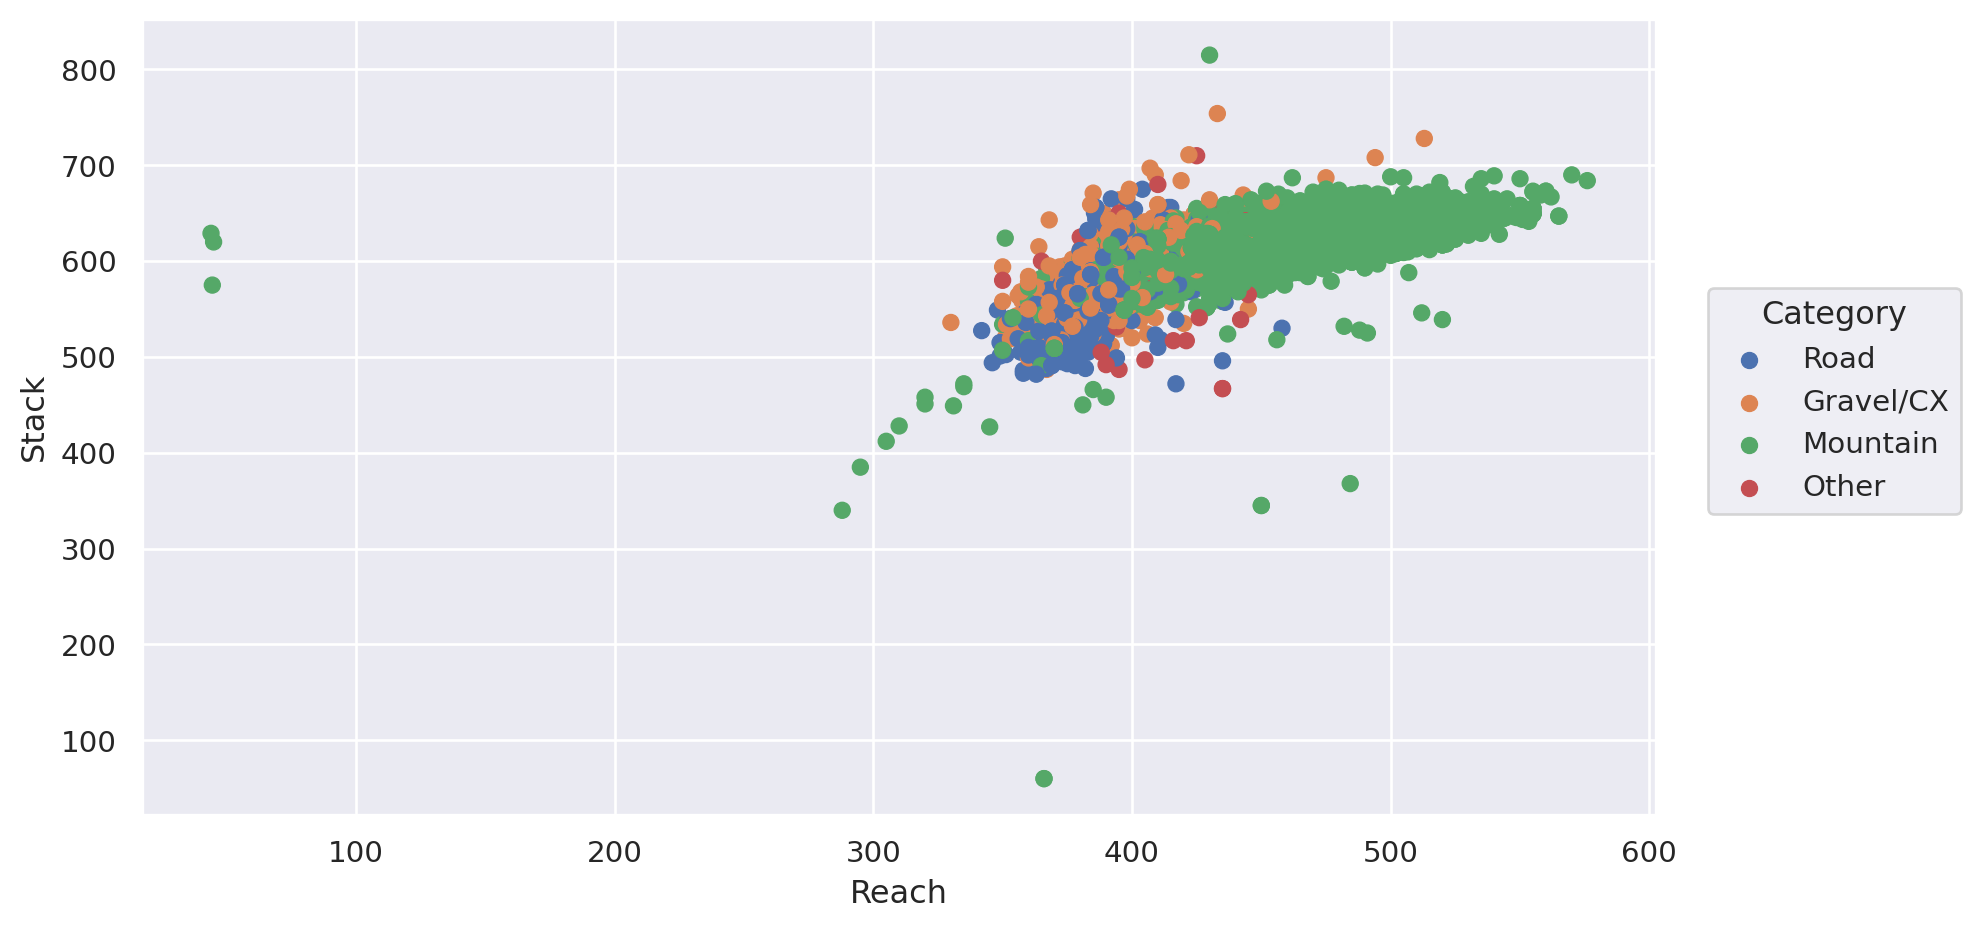

In [13]:
so.Plot(
    data=dfsr,
    x='Reach',
    y='Stack',
    color='Category'
).add(so.Dot()).layout(size=(9,5))

In [14]:
dfsr.filter(
    (pl.col('Reach') < 250) |
     (pl.col('Stack') < 300)
)

shape: (5, 19)
┌───────────┬───────────┬──────────┬──────┬─────┬────────────┬────────────┬───────────┬────────────┐
│ URL       ┆ Brand     ┆ Model    ┆ Year ┆ ... ┆ Seat Tube  ┆ Chainstay  ┆ Wheelbase ┆ Bottom     │
│ ---       ┆ ---       ┆ ---      ┆ ---  ┆     ┆ Length     ┆ Length     ┆ ---       ┆ Bracket    │
│ str       ┆ str       ┆ str      ┆ str  ┆     ┆ ---        ┆ ---        ┆ f64       ┆ Offset     │
│           ┆           ┆          ┆      ┆     ┆ f64        ┆ f64        ┆           ┆ ---        │
│           ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆ f64        │
╞═══════════╪═══════════╪══════════╪══════╪═════╪════════════╪════════════╪═══════════╪════════════╡
│ https://g ┆ Cannondal ┆ Habit AL ┆ 2021 ┆ ... ┆ 380.0      ┆ 435.0      ┆ 1103.0    ┆ 28.0       │
│ eometrics ┆ e         ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ .mtb-news ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ .de/b...  ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://g ┆ Cannondal ┆ Habit    ┆ 2021 ┆ ... ┆ 380.0      ┆ 435.0      ┆ 1103.0    ┆ 28.0       │
│ eometrics ┆ e         ┆ Carbon   ┆      ┆     ┆            ┆            ┆           ┆            │
│ .mtb-news ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ .de/b...  ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://g ┆ Cannondal ┆ Trail SE ┆ 2022 ┆ ... ┆ 470.0      ┆ 435.0      ┆ 1173.0    ┆ 56.0       │
│ eometrics ┆ e         ┆ 2        ┆      ┆     ┆            ┆            ┆           ┆            │
│ .mtb-news ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ .de/b...  ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://g ┆ Intense   ┆ Sniper   ┆ 2022 ┆ ... ┆ 437.0      ┆ 439.0      ┆ 1152.0    ┆ 38.0       │
│ eometrics ┆           ┆ XC       ┆      ┆     ┆            ┆            ┆           ┆            │
│ .mtb-news ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ .de/b...  ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://g ┆ Rocky     ┆ Instinct ┆ 2022 ┆ ... ┆ 420.0      ┆ 437.0      ┆ 1225.0    ┆ 36.0       │
│ eometrics ┆ Mountain  ┆ Powerpla ┆      ┆     ┆            ┆            ┆           ┆            │
│ .mtb-news ┆           ┆ y        ┆      ┆     ┆            ┆            ┆           ┆            │
│ .de/b...  ┆           ┆          ┆      ┆     ┆            ┆            ┆           ┆            │
└───────────┴───────────┴──────────┴──────┴─────┴────────────┴────────────┴───────────┴────────────┘

In [15]:
dfsr = dfsr.filter(
    (pl.col('Reach') > 250) &
    (pl.col('Stack') > 300)
)

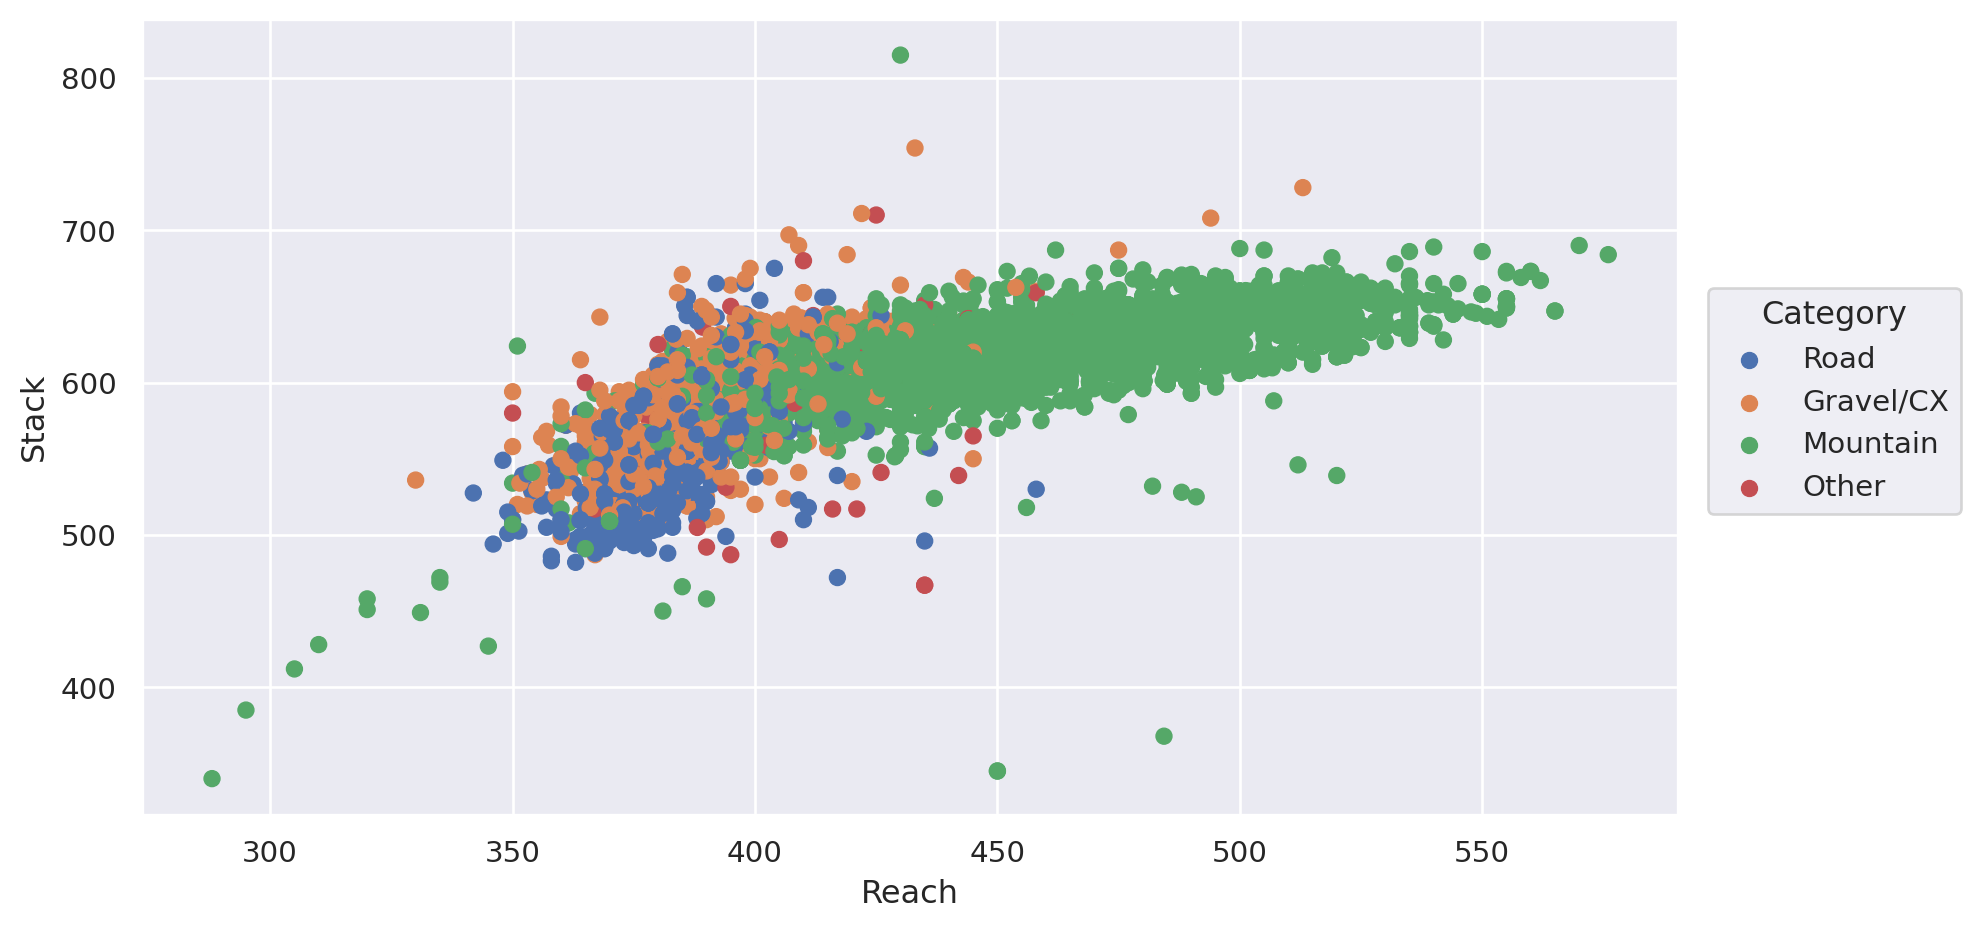

In [16]:
so.Plot(
    data=dfsr,
    x='Reach',
    y='Stack',
    color='Category'
).add(so.Dot()).layout(size=(9,5))

In [17]:
dfsr = dfsr.filter (
    ~pl.all(pl.col('Chainstay Length')).is_null()
)

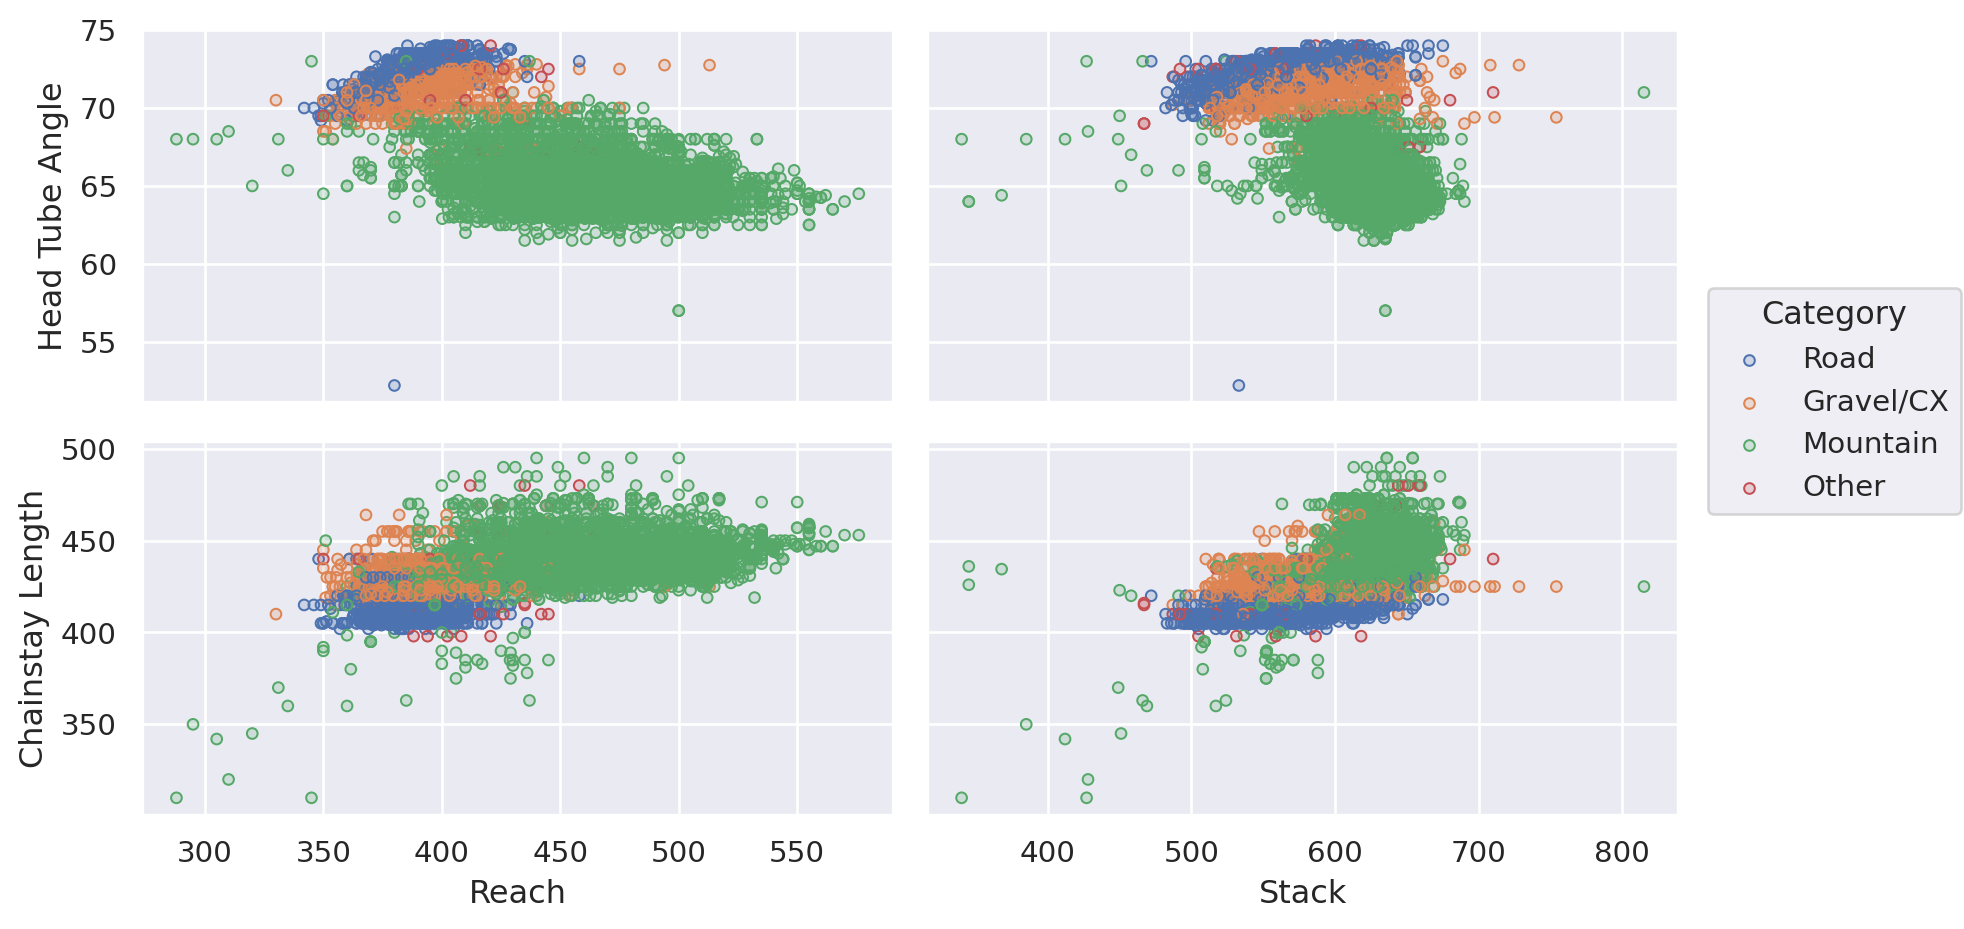

In [18]:
dfsr = dfsr.filter(
    (pl.col('Chainstay Length') > 300)
)
so.Plot(
    data=dfsr
).pair(
    x=['Reach', 'Stack'],
    y=['Head Tube Angle', 'Chainstay Length'],
).add(so.Dots(), color='Category').layout(size=(9,5))

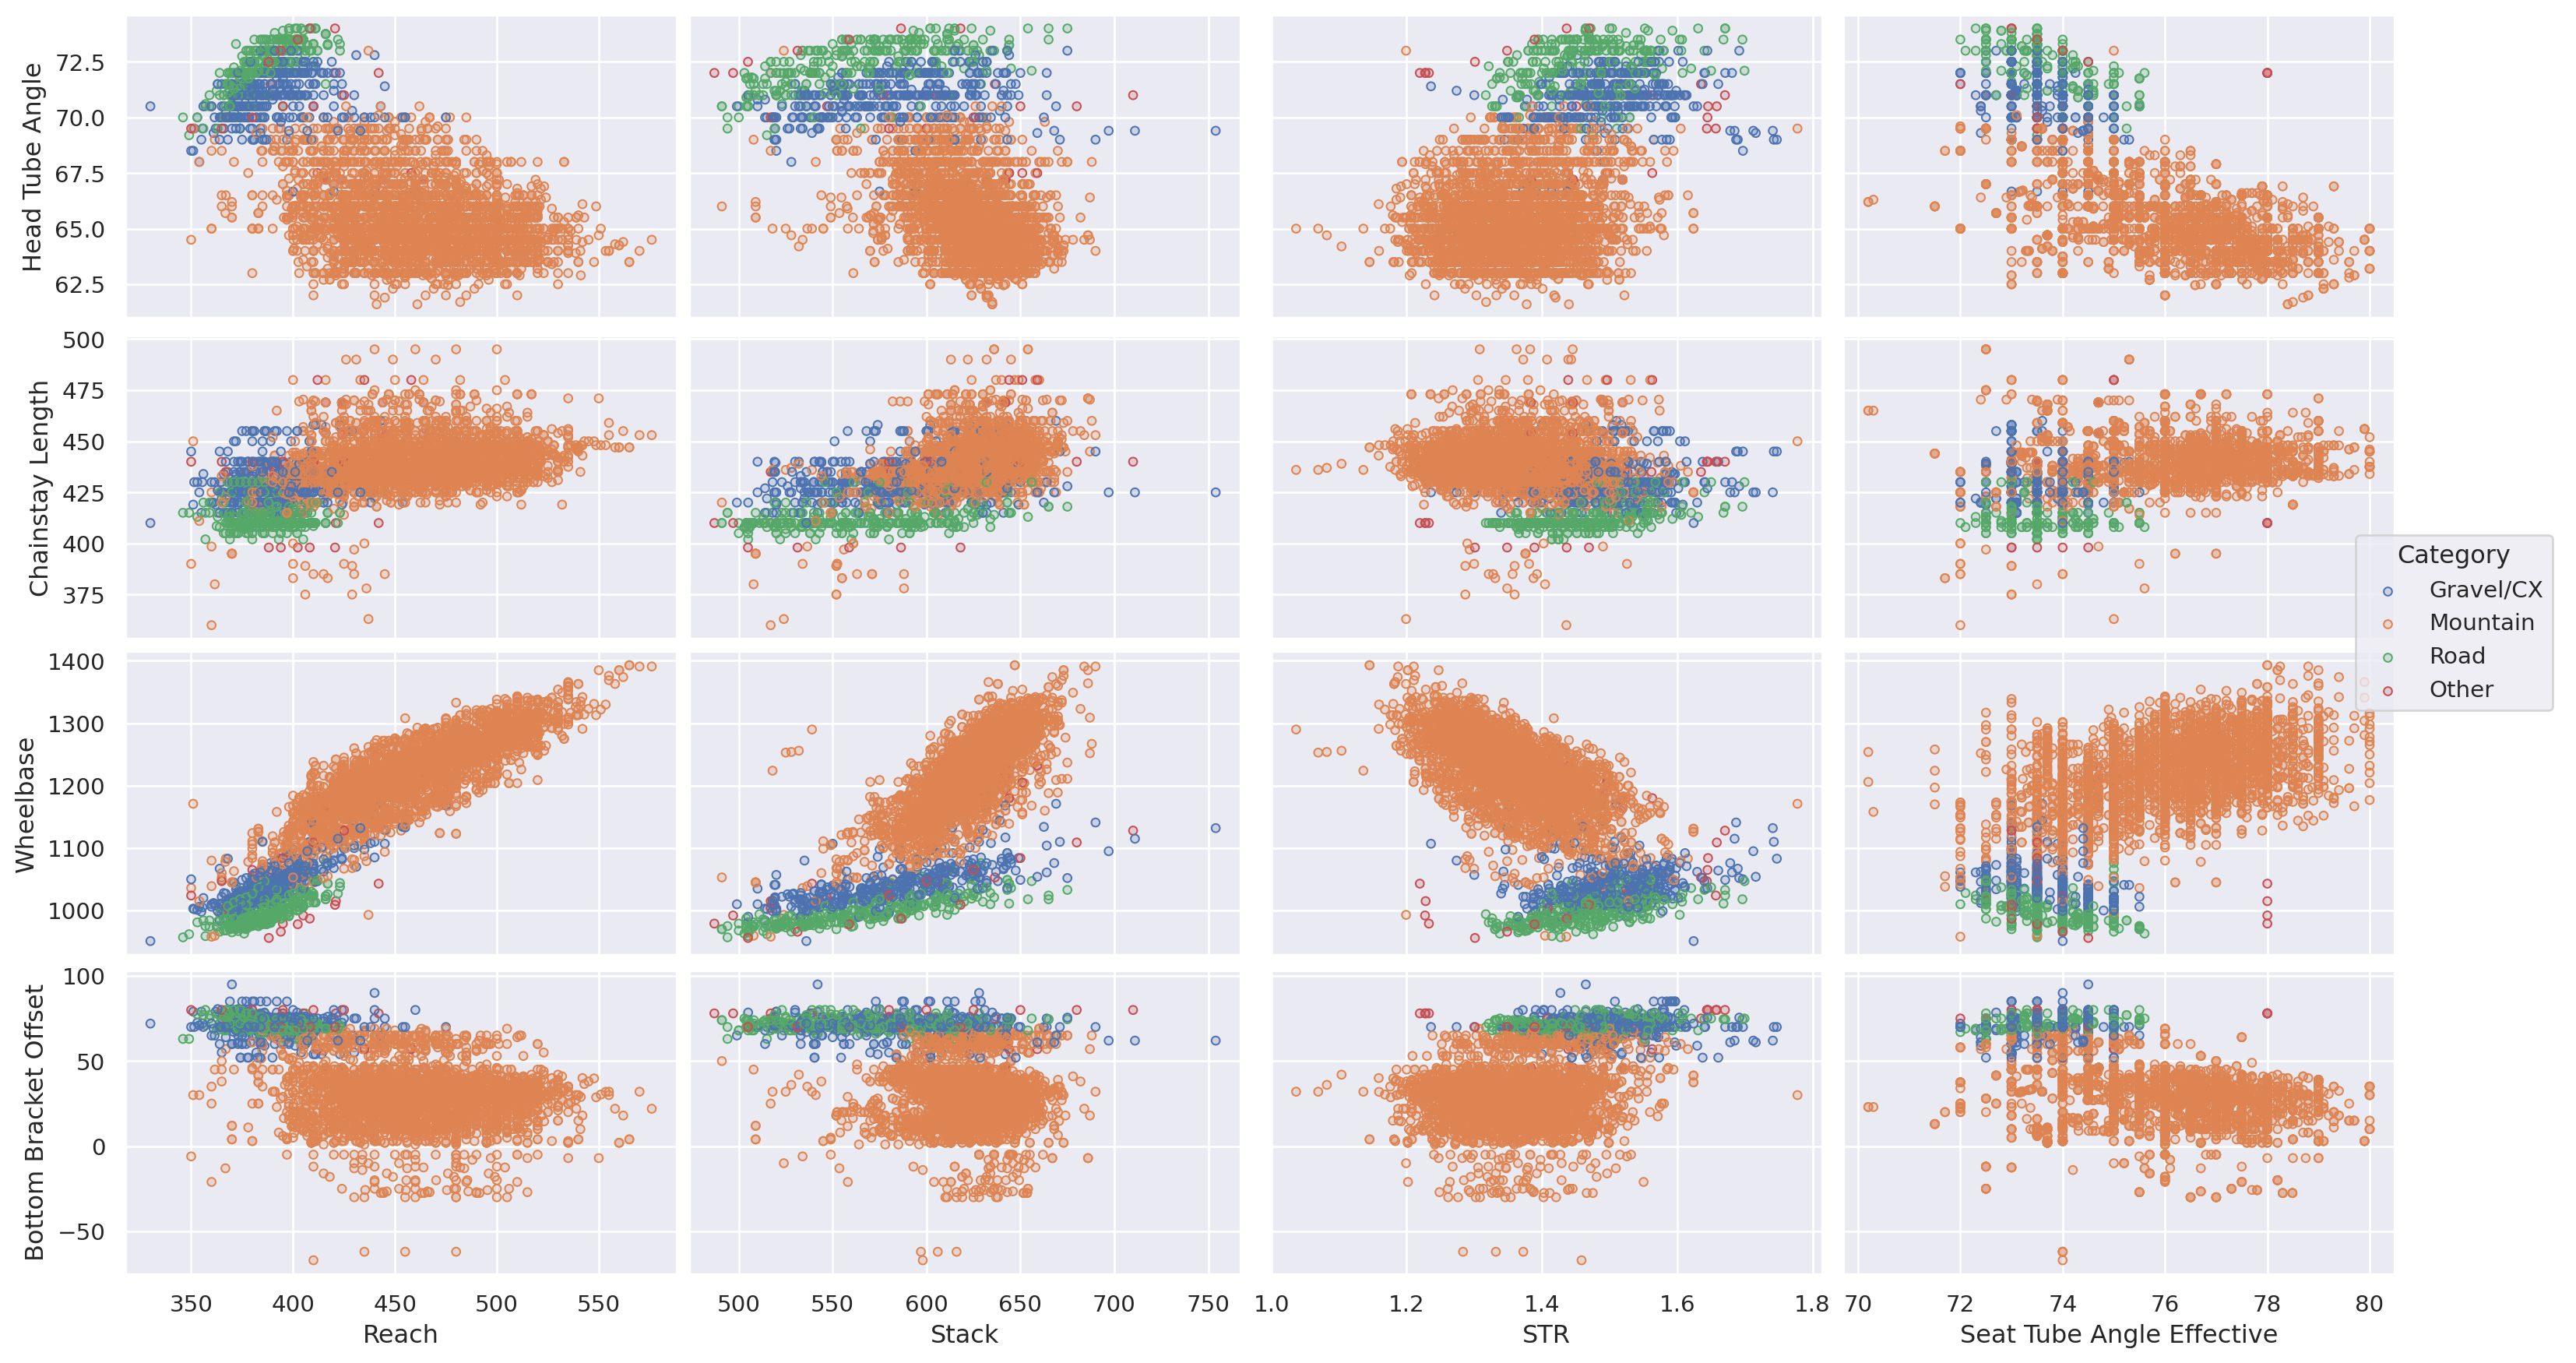

In [19]:
dfsr = dfsr.filter(
    ~pl.all(pl.col('STR')).is_null() &
    ~pl.all(pl.col('Seat Tube Angle Effective')).is_null() &
    ~pl.all(pl.col('Wheelbase')).is_null() &
    ~pl.all(pl.col('Bottom Bracket Offset')).is_null() &
    (pl.col('Wheelbase') < 3000) &
    (pl.col('Wheelbase') > 500) &
    (pl.col('Bottom Bracket Offset') < 150) &
    (pl.col('Seat Tube Angle Effective') > 70) & 
    (pl.col('STR') > 1.0) & 
    (pl.col('Stack') > 470) &
    (pl.col('Head Tube Angle') > 61.0)
)

so.Plot(
    data=dfsr
).pair(
    x=['Reach', 'Stack', 'STR', 'Seat Tube Angle Effective'],
    y=['Head Tube Angle', 'Chainstay Length', 'Wheelbase', 'Bottom Bracket Offset'],
).add(so.Dots(), color='Category').layout(size=(16, 9), engine='constrained')

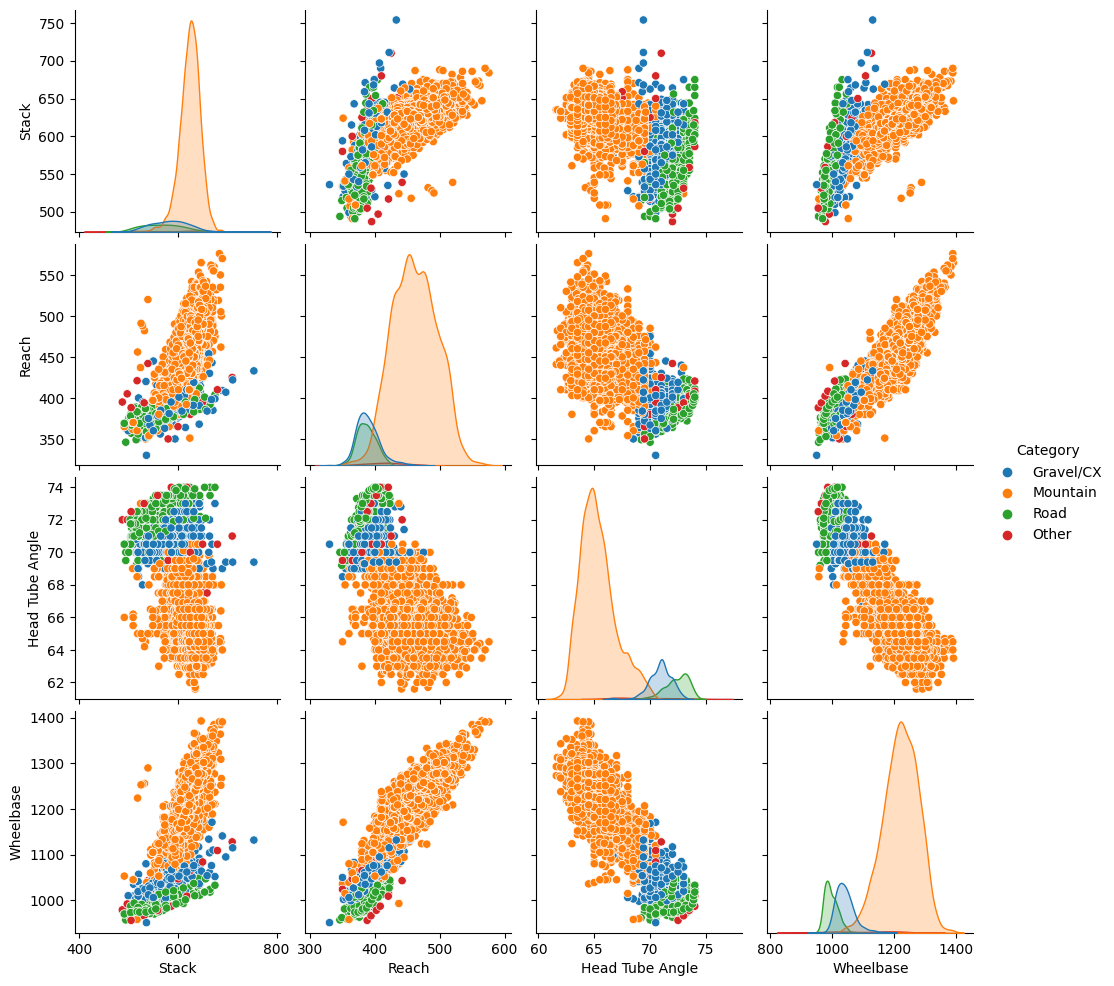

In [20]:

sns.pairplot(
    dfsr.select(
        ['Category',
         'Stack', 
         'Reach',
         'Head Tube Angle',
         'Wheelbase']
    ).to_pandas(), hue='Category')

In [21]:
dfsr

shape: (4181, 19)
┌───────────────┬────────┬─────────┬──────┬─────┬────────────┬────────────┬───────────┬────────────┐
│ URL           ┆ Brand  ┆ Model   ┆ Year ┆ ... ┆ Seat Tube  ┆ Chainstay  ┆ Wheelbase ┆ Bottom     │
│ ---           ┆ ---    ┆ ---     ┆ ---  ┆     ┆ Length     ┆ Length     ┆ ---       ┆ Bracket    │
│ str           ┆ str    ┆ str     ┆ str  ┆     ┆ ---        ┆ ---        ┆ f64       ┆ Offset     │
│               ┆        ┆         ┆      ┆     ┆ f64        ┆ f64        ┆           ┆ ---        │
│               ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆ f64        │
╞═══════════════╪════════╪═════════╪══════╪═════╪════════════╪════════════╪═══════════╪════════════╡
│ https://geome ┆ 3T     ┆ Exploro ┆ 2021 ┆ ... ┆ 436.0      ┆ 415.0      ┆ 998.0     ┆ 79.0       │
│ trics.mtb-new ┆        ┆ Race    ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://geome ┆ 3T     ┆ Exploro ┆ 2021 ┆ ... ┆ 463.0      ┆ 415.0      ┆ 1008.0    ┆ 79.0       │
│ trics.mtb-new ┆        ┆ Race    ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://geome ┆ 3T     ┆ Exploro ┆ 2021 ┆ ... ┆ 490.0      ┆ 415.0      ┆ 1008.0    ┆ 77.0       │
│ trics.mtb-new ┆        ┆ Race    ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://geome ┆ 3T     ┆ Exploro ┆ 2021 ┆ ... ┆ 518.0      ┆ 415.0      ┆ 1014.0    ┆ 77.0       │
│ trics.mtb-new ┆        ┆ Race    ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ ...           ┆ ...    ┆ ...     ┆ ...  ┆ ... ┆ ...        ┆ ...        ┆ ...       ┆ ...        │
│ https://geome ┆ Zoceli ┆ Naosm   ┆ 2021 ┆ ... ┆ 380.0      ┆ 435.0      ┆ 1209.0    ┆ 29.0       │
│ trics.mtb-new ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://geome ┆ Zoceli ┆ Naosm   ┆ 2021 ┆ ... ┆ 405.0      ┆ 435.0      ┆ 1229.0    ┆ 29.0       │
│ trics.mtb-new ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://geome ┆ Zoceli ┆ Naosm   ┆ 2021 ┆ ... ┆ 430.0      ┆ 435.0      ┆ 1258.0    ┆ 29.0       │
│ trics.mtb-new ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ https://geome ┆ Zoceli ┆ Naosm   ┆ 2021 ┆ ... ┆ 455.0      ┆ 435.0      ┆ 1278.0    ┆ 29.0       │
│ trics.mtb-new ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
│ s.de/b...     ┆        ┆         ┆      ┆     ┆            ┆            ┆           ┆            │
└───────────────┴────────┴─────────┴──────┴─────┴────────────┴────────────┴───────────┴────────────┘

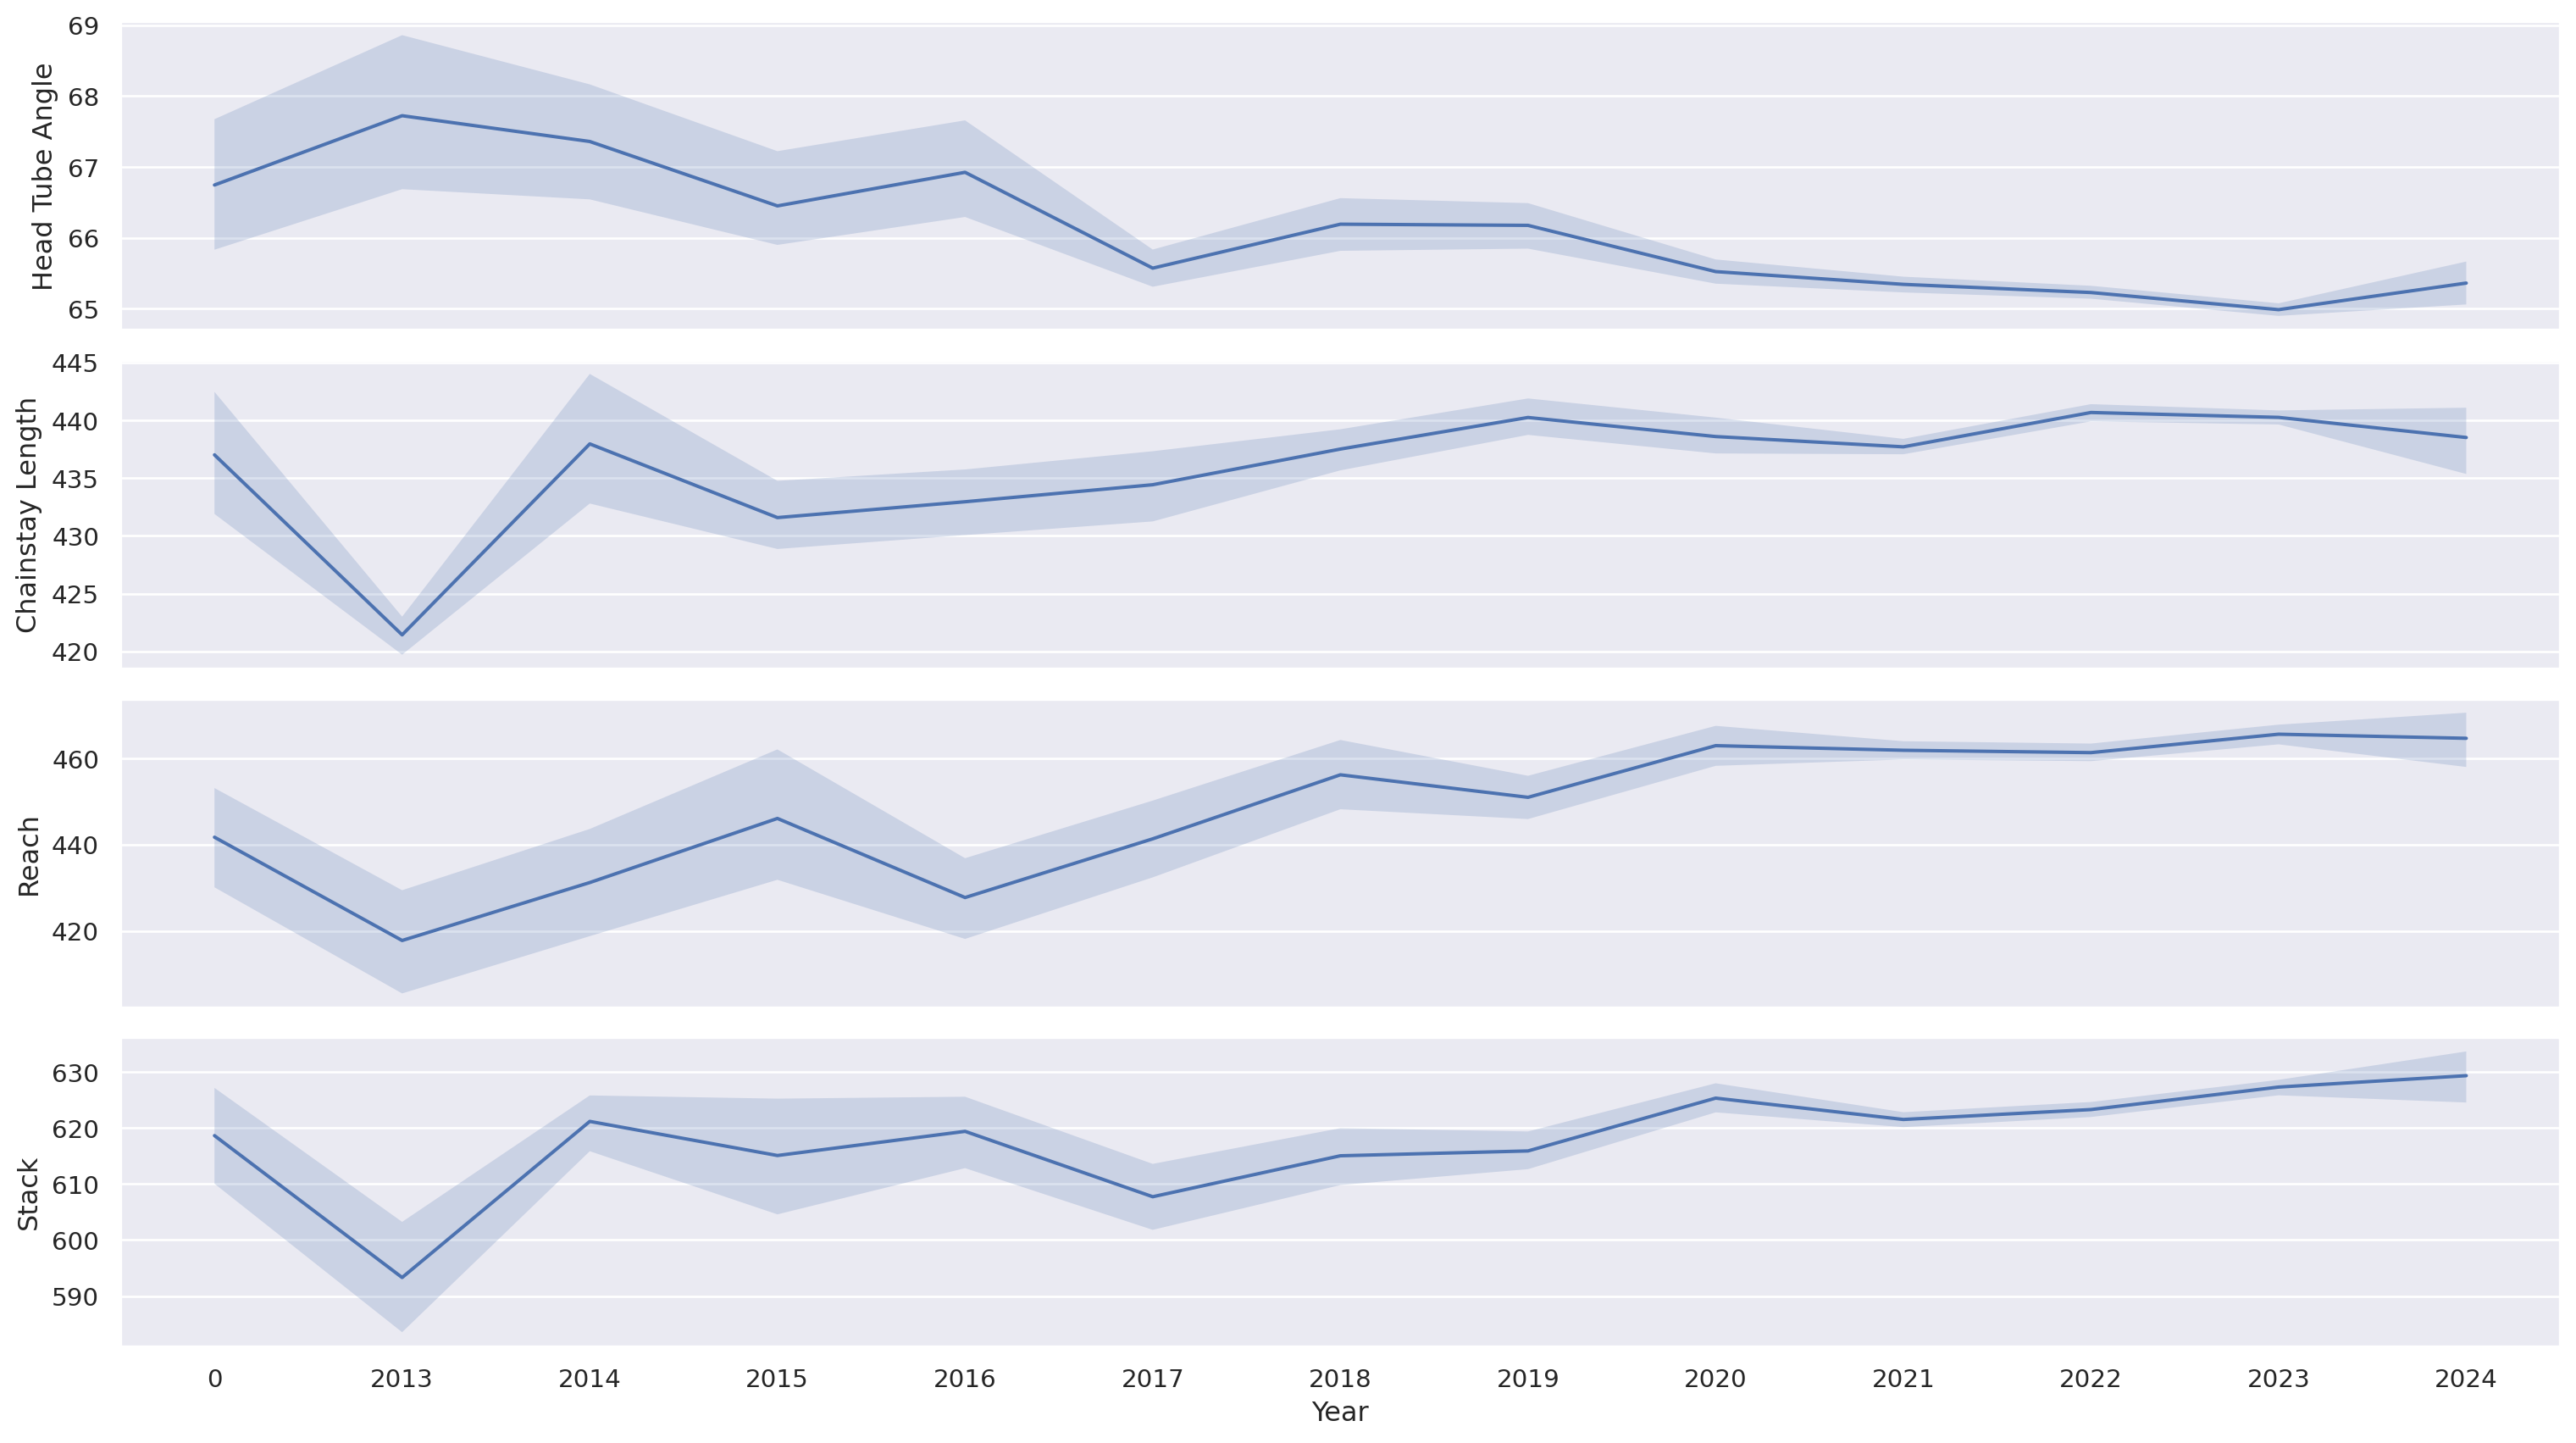

In [22]:
#dfsr.with_columns(
#    pl.col('Year').cast(pl.Int32)
#)

#dfsr = dfsr.filter(
#    (pl.col('Year') > 1991)
#)

# plot the median values for each year
(
so.Plot(
    data=dfsr.sort('Year').filter((pl.col('Category') == 'Mountain'))
)
.pair(
    x=['Year'],
    y=['Head Tube Angle', 'Chainstay Length', 'Reach', 'Stack'])
.add(so.Line(), so.Agg('mean'))
.add(so.Band(), so.Est())
.layout(size=(16, 9))
)